In [1]:
import pandas as pd
pd.set_option('chained_assignment',None)
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.rcParams['figure.figsize']=9,5


In [2]:
monthly_data=pd.read_csv("Cleansed_mandi_data.csv")
msp_data=pd.read_csv("Cleansed_msp_data.csv")
monthly_data.head()

,Unnamed: 0,APMC,commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,commodity.1
0,0,Ahmednagar,bajri,2015,April,79,1406,1538,1463,2015-04-01,Ahmadnagar,sunflower
1,1,Ahmednagar,bajri,2016,April,106,1788,1925,1875,2016-04-01,Ahmadnagar,sunflower
2,2,Ahmednagar,wheat(husked),2015,April,1253,1572,1890,1731,2015-04-01,Ahmadnagar,sunflower
3,3,Ahmednagar,wheat(husked),2016,April,387,1750,2220,1999,2016-04-01,Ahmadnagar,sunflower
4,4,Ahmednagar,sorgum(jawar),2015,April,3825,1600,2200,1900,2015-04-01,Ahmadnagar,sunflower


In [3]:
def find_type_outliers(df): #find outlier according to the msprice range of individual Crop Type
    types=list(df["Type"].unique())
    for typ in types:
        data_temp=df[df["Type"]==typ]
        actual=len(data_temp)
        q1 = data_temp["msprice"].quantile(0.25)
        q3 = data_temp["msprice"].quantile(0.75)
        iqr = q3-q1 #Interquartile range
        lower_threshold  = q1-1.5*iqr
        upper_threshold = q3+1.5*iqr
        data_filter=data_temp[(data_temp["msprice"] > lower_threshold) & (data_temp["msprice"] < upper_threshold)]
        filtered=len(data_filter)
        if actual!=filtered:
            print(typ)
        else:
            print("No outlier found in ",typ)

## Box plot of types of crops

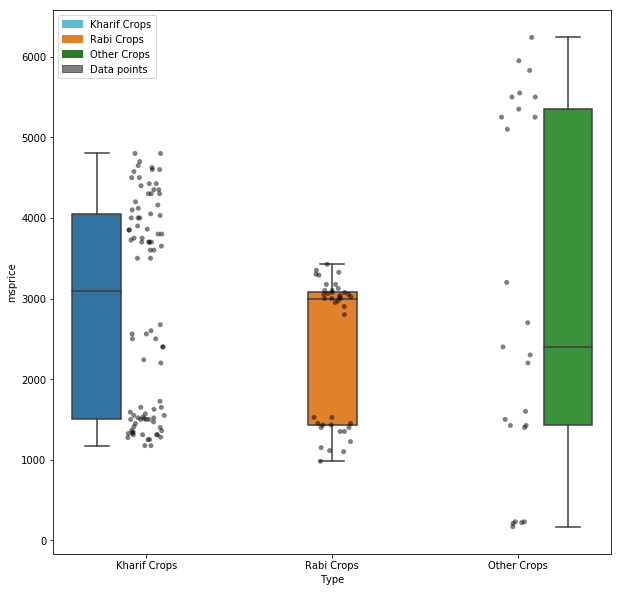

In [4]:
plt.figure(figsize=(10,10))
sns.boxplot(x="Type", y="msprice",hue='Type',data=msp_data) #box plot
sns.stripplot(y='msprice', x='Type',data=msp_data,jitter=True,marker='o',alpha=0.5,color='black') #overlay data point
patch_1 = mpatches.Patch(color='#5DBCD2', label='Kharif Crops')
patch_2 = mpatches.Patch(color='#E58028', label='Rabi Crops')
patch_3 = mpatches.Patch(color='#297925', label='Other Crops')
patch_4= mpatches.Patch(color='black', label='Data points',alpha=0.5)
plt.legend(handles=[patch_1,patch_2,patch_3,patch_4])
plt.show()

### Outlier Filtering-
###### We can either remove outliers or replece them with mean/median values.
###### We remove outliers for Monthly data, and replace them for MSP data because there is significant losss of data

In [5]:
def outlier_replaced(df,column):
    output = pd.DataFrame()
    comm = list(df['commodity'].unique())
    for i in comm:
        temp_df = df[df['commodity']==i]
        temp_df.drop(labels=['Unnamed: 0'],axis=1,inplace=True)
        temp_df.reset_index(drop=True,inplace=True)
        quantile1 = temp_df[column].quantile(0.25)
        quantile3 = temp_df[column].quantile(0.75)
        iqr = quantile3-quantile1
        lower_threshold = quantile1-1.5*iqr
        upper_threshold = quantile3+1.5*iqr
        for x in range(len(temp_df)):
            if(temp_df.loc[x,column]<upper_threshold and temp_df.loc[x,column]>lower_threshold):
                continue
            elif(temp_df.loc[x,column]<lower_threshold):
                temp_df.loc[x,column]=lower_threshold
            else:
                temp_df.loc[x,column]=upper_threshold
        output = pd.concat([temp_df,output])
        output.reset_index(drop=True,inplace=True)
    return output

In [18]:
replace_monthly_data=outlier_replaced(monthly_data,'modal_price')
replace_msp_data = outlier_replaced(msp_data,'msprice')

In [8]:
def remove(df,column_name):
    output = pd.DataFrame()
    comm = list(df['commodity'].unique())
    for i in comm:
        temp_df = df[df['commodity']==i]
        temp_df.drop(labels=['Unnamed: 0'],axis=1,inplace=True)
        temp_df.reset_index(drop=True,inplace=True)
        quratile1 = temp_df[column_name].quantile(0.25)
        quratile3 = temp_df[column_name].quantile(0.75)
        iqr = quratile3-quratile1
        lower_threshold = quratile1-1.5*iqr
        upper_threshold = quratile3+1.5*iqr
        for x in range(len(temp_df)):
            if(temp_df.loc[x,column_name]<upper_threshold and temp_df.loc[x,column_name]>lower_threshold):
                continue
            else:
                temp_df.loc[x,column_name]=np.nan
        output = pd.concat([temp_df,output])
        output.dropna(how='any',inplace=True)
        output.reset_index(drop=True,inplace=True)
        
    return output

In [10]:
remove_monthly_data = remove(monthly_data,'modal_price')
remove_msp_data = remove(msp_data,'msprice')

In [11]:
remove_monthly_data=remove_monthly_data [~((remove_monthly_data ['min_price']==0)|(remove_monthly_data ['max_price']==0)|(remove_monthly_data ['modal_price']==0))]

In [12]:
print(len(remove_monthly_data)/len(monthly_data)) #Before removal of '0' prices


0.9667782601034776


In [13]:
monthly_data['commodity'].value_counts()


gram                     4115
wheat(husked)            4097
soybean                  3727
sorgum(jawar)            3716
pigeon pea (tur)         3477
maize                    2546
green gram               2425
bajri                    2346
onion                    1872
black gram               1675
ground nut pods (dry)    1068
cotton                   1063
tomato                   1021
brinjal                  1008
ladies finger             921
paddy-unhusked            911
cabbage                   893
green chilli              844
cucumber                  835
flower                    824
bitter gourd              822
potato                    718
cluster bean              701
rice(paddy-hus)           669
capsicum                  656
bottle gourd              596
garlic                    580
pomegranate               565
sesamum                   544
ginger (fresh)            518
                         ... 
oth.split pulses            4
gulchadi                    4
amba koy  

#### Plotting top 5 commodities, using box plots to observe difference in filtered and original data


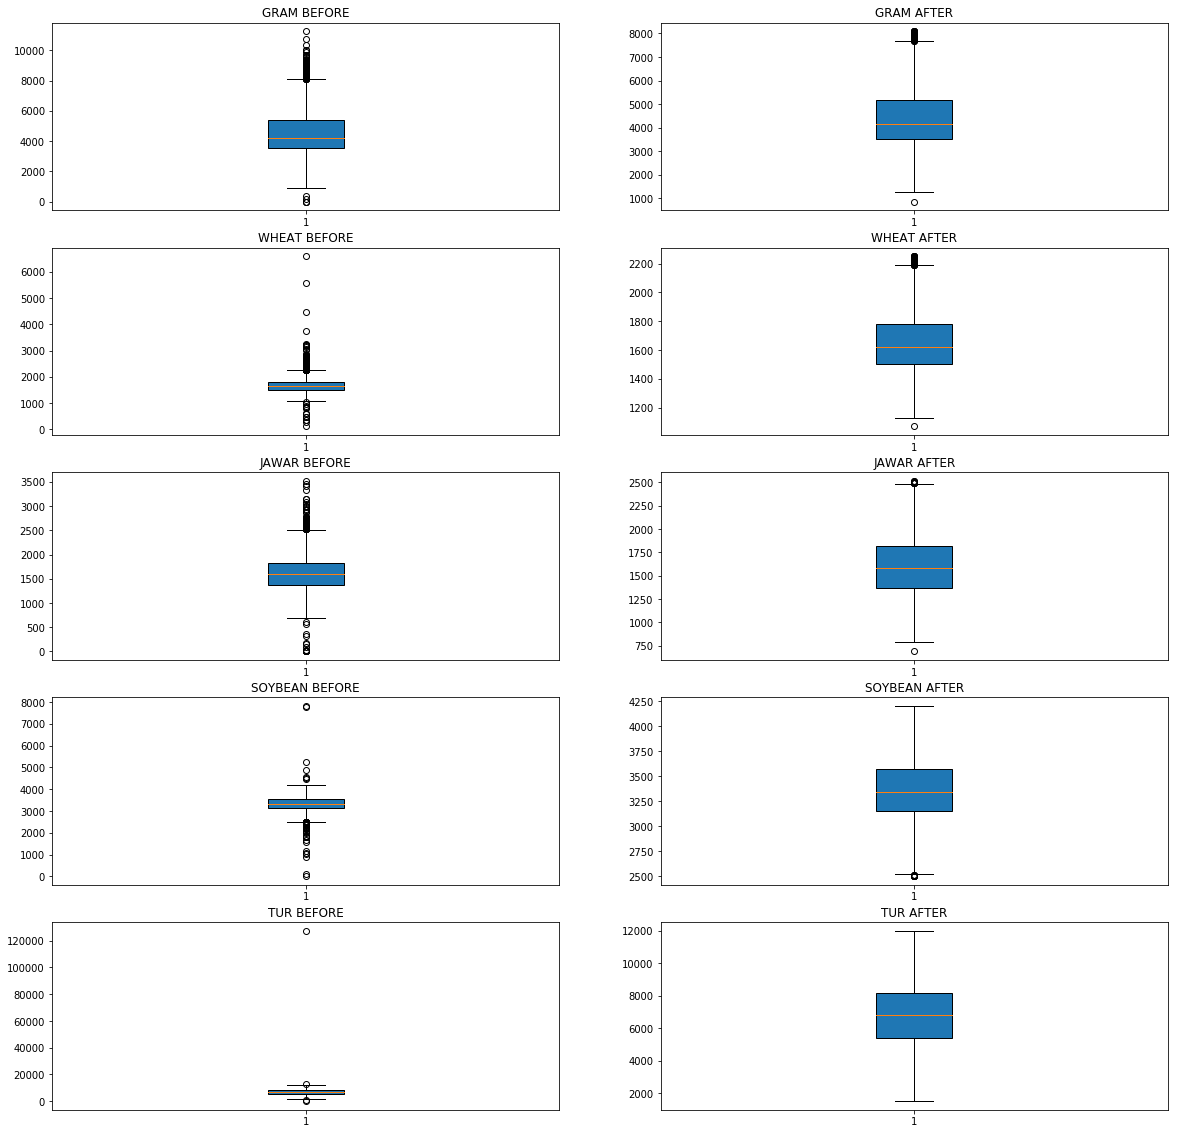

In [15]:
from pylab import rcParams
rcParams['figure.figsize']=20,20
figure = plt.figure()

a = monthly_data.groupby(['commodity']).get_group('gram')['modal_price']
plt.subplot(5,2,1)
plt.title("GRAM BEFORE")
plt.boxplot(a,patch_artist = True)

a = remove_monthly_data.groupby(['commodity']).get_group('gram')['modal_price']
plt.subplot(5,2,2)
plt.title("GRAM AFTER")
plt.boxplot(a,patch_artist = True)

a = monthly_data.groupby(['commodity']).get_group('wheat(husked)')['modal_price']
plt.subplot(5,2,3)
plt.title("WHEAT BEFORE")
plt.boxplot(a,patch_artist = True)

a = remove_monthly_data.groupby(['commodity']).get_group('wheat(husked)')['modal_price']
plt.subplot(5,2,4)
plt.title("WHEAT AFTER")
plt.boxplot(a,patch_artist = True)

a = monthly_data.groupby(['commodity']).get_group('sorgum(jawar)')['modal_price']
plt.subplot(5,2,5)
plt.title("JAWAR BEFORE")
plt.boxplot(a,patch_artist = True)

a = remove_monthly_data.groupby(['commodity']).get_group('sorgum(jawar)')['modal_price']
plt.subplot(5,2,6)
plt.title("JAWAR AFTER")
plt.boxplot(a,patch_artist = True)

a = monthly_data.groupby(['commodity']).get_group('soybean')['modal_price']
plt.subplot(5,2,7)
plt.title("SOYBEAN BEFORE")
plt.boxplot(a,patch_artist = True)

a = remove_monthly_data.groupby(['commodity']).get_group('soybean')['modal_price']
plt.subplot(5,2,8)
plt.title("SOYBEAN AFTER")
plt.boxplot(a,patch_artist = True)

a = monthly_data.groupby(['commodity']).get_group('pigeon pea (tur)')['modal_price']
plt.subplot(5,2,9)
plt.title("TUR BEFORE")
plt.boxplot(a,patch_artist = True)

a = remove_monthly_data.groupby(['commodity']).get_group('pigeon pea (tur)')['modal_price']
plt.subplot(5,2,10)
plt.title("TUR AFTER")
plt.boxplot(a,patch_artist = True)


In [20]:
msp_data.commodity.value_counts()
replace_msp_data['commodity'] = replace_msp_data['commodity'].replace({'sugar-cane':'sugarcane'})
replace_msp_data['commodity'] = replace_msp_data['commodity'].replace({'soyabean':'soybean'})

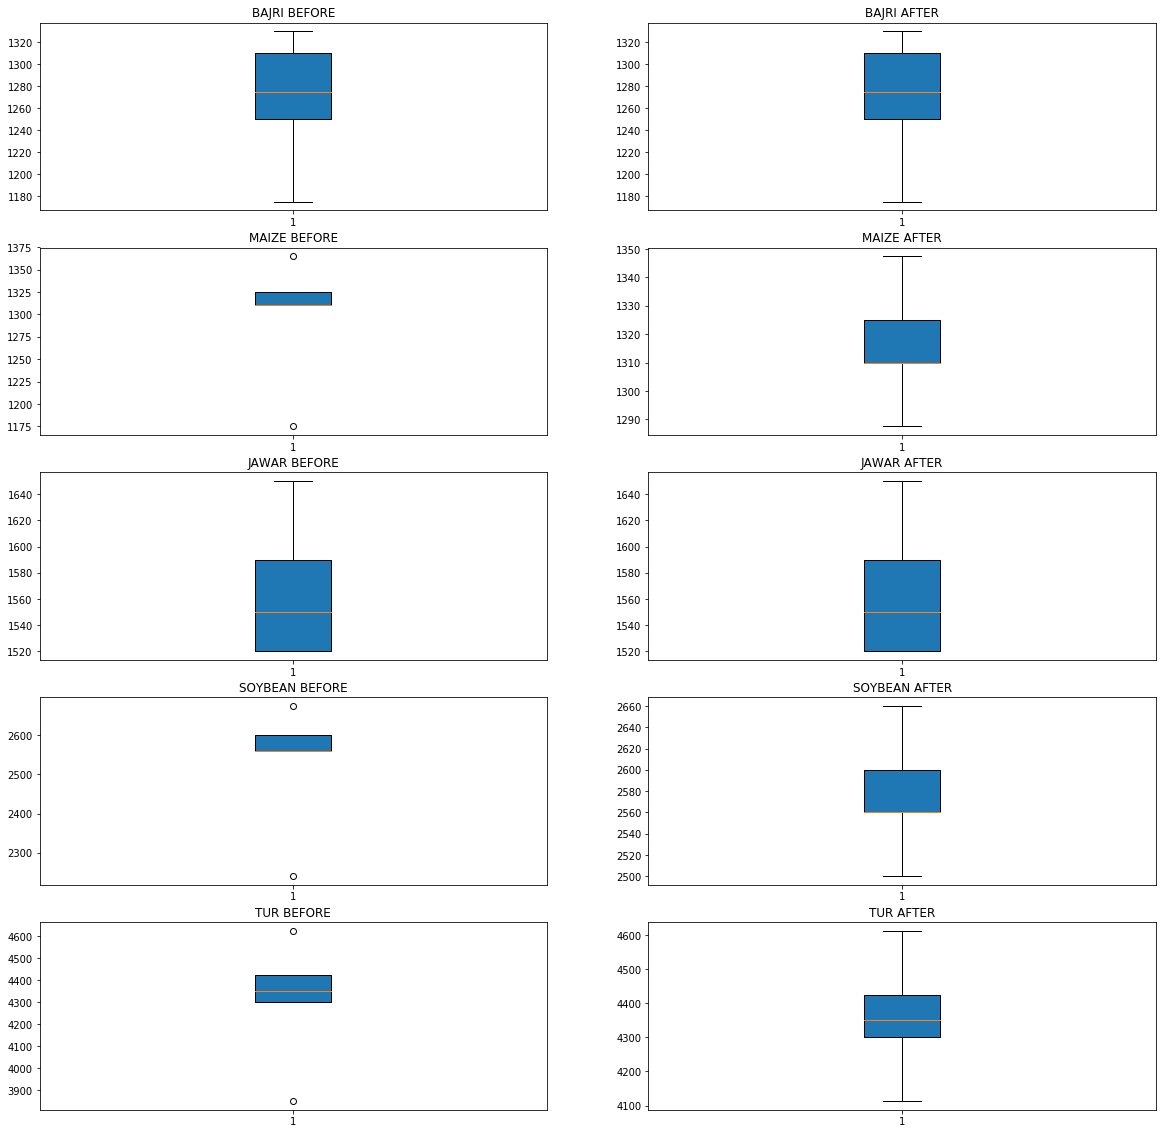

In [21]:
rcParams['figure.figsize']=20,20
figure = plt.figure()

a = msp_data.groupby(['commodity']).get_group('bajri')['msprice']
plt.subplot(5,2,1)
plt.title("BAJRI BEFORE")
plt.boxplot(a,patch_artist = True)

a = replace_msp_data.groupby(['commodity']).get_group('bajri')['msprice']
plt.subplot(5,2,2)
plt.title("BAJRI AFTER")
plt.boxplot(a,patch_artist = True)

a = msp_data.groupby(['commodity']).get_group('maize')['msprice']
plt.subplot(5,2,3)
plt.title("MAIZE BEFORE")
plt.boxplot(a,patch_artist = True)

a = replace_msp_data.groupby(['commodity']).get_group('maize')['msprice']
plt.subplot(5,2,4)
plt.title("MAIZE AFTER")
plt.boxplot(a,patch_artist = True)

a = msp_data.groupby(['commodity']).get_group('sorgum(jawar)')['msprice']
plt.subplot(5,2,5)
plt.title("JAWAR BEFORE")
plt.boxplot(a,patch_artist = True)

a = replace_msp_data.groupby(['commodity']).get_group('sorgum(jawar)')['msprice']
plt.subplot(5,2,6)
plt.title("JAWAR AFTER")
plt.boxplot(a,patch_artist = True)

a = msp_data.groupby(['commodity']).get_group('soyabean')['msprice']
plt.subplot(5,2,7)
plt.title("SOYBEAN BEFORE")
plt.boxplot(a,patch_artist = True)

a = replace_msp_data.groupby(['commodity']).get_group('soybean')['msprice']
plt.subplot(5,2,8)
plt.title("SOYBEAN AFTER")
plt.boxplot(a,patch_artist = True)

a = msp_data.groupby(['commodity']).get_group('pigeon pea (tur)')['msprice']
plt.subplot(5,2,9)
plt.title("TUR BEFORE")
plt.boxplot(a,patch_artist = True)

a = replace_msp_data.groupby(['commodity']).get_group('pigeon pea (tur)')['msprice']
plt.subplot(5,2,10)
plt.title("TUR AFTER")
plt.boxplot(a,patch_artist = True)
plt.savefig('MSP_data_outlier.png',dpi=200)

In [22]:
remove_monthly_data.to_csv('Outlier_removed_mandi_data.csv',index=False)
replace_msp_data.to_csv('Outlier_removed_msp_data.csv',index= False)

## Saumya Seasonalize

In [109]:
monthly_data = pd.read_csv("Outlier_removed_mandi_data.csv")
from datetime import datetime
monthly_data['date'] = pd.to_datetime(monthly_data['date'])
monthly_data.index = monthly_data['date']

#The data is not sorted by date and also the date is repetitive for each commodity for each apmc
monthly_data.sort_values(by='date', inplace=True)
monthly_data.head()

C:\Users\Niranjan\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: 'date' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  import sys


,APMC,commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name
date,,,,,,,,,,
2014-09-01,Lonand,maize,2014,September,73,1400,1463,1431.0,2014-09-01,Satara
2014-09-01,Amarawati,green gram,2014,September,16,6000,6825,6400.0,2014-09-01,Amaravathi
2014-09-01,Lasalgaon,green gram,2014,September,9,5900,6617,6234.0,2014-09-01,Nasik
2014-09-01,Telhara,soybean,2014,September,565,3102,3221,3150.0,2014-09-01,Akola
2014-09-01,Vasai,paddy-unhusked,2014,September,80,1500,1800,1650.0,2014-09-01,Thane


In [113]:
monthly_data['commodity'] = [i.lower() for i in monthly_data.commodity.values]


C:\Users\Niranjan\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


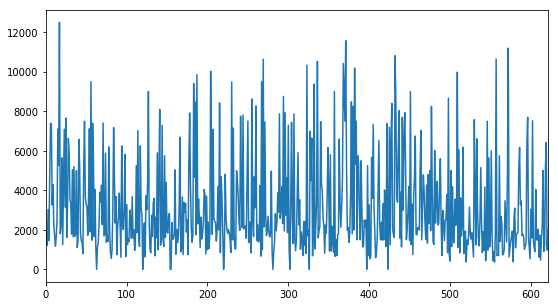

In [154]:
sns.tsplot(monthly_data.loc[monthly_data["APMC" ]== "Ahmednagar","modal_price"])


In [115]:
monthly_data.APMC.value_counts()


Mumbai                    1460
Pune                      1390
Nagpur                    1315
Jalgaon                   1045
Barshi                    1042
Solapur                    954
Shrirampur                 938
Kamthi                     924
Aurangabad                 903
Pune-Manjri                900
Kalyan                     867
Rahata                     822
Amarawati                  791
Karad                      775
Kolhapur                   774
Nashik                     718
Pune-Pimpri                642
Ahmednagar                 622
Ramtek                     585
Satara                     534
Akluj                      524
Osmanabad                  487
Chandrapur-Ganjwad         450
Manchar                    448
Sangali                    432
Dhule                      427
Ratanagari                 412
Vadgaon Peth               408
Kalmeshwar                 408
Khamgaon                   399
                          ... 
Umrane                      13
Hingoli-

In [117]:
monthly_data.query('APMC == "Mumbai"').commodity.value_counts()


squash gourd             27
green-peas               27
sugar                    27
flower                   27
small gourd              27
chillies(red)            27
curry leaves             27
arvi                     27
cowpea                   27
split gram               27
cucumber                 27
fennel                   27
green peas (dry)         27
snake gourd              27
bitter gourd             27
spilt pigeon pea         27
split lentil             27
cardamom                 27
ladies finger            27
carrot                   27
sweet potato             27
tamarind                 27
split black gram         27
ginger (dry)             27
coconut                  27
jaggery                  26
bottle gourd             26
cummin                   26
elephant root            26
capsicum                 26
                         ..
garlic                   21
orange                   21
guava                    21
horse gram               21
apple               

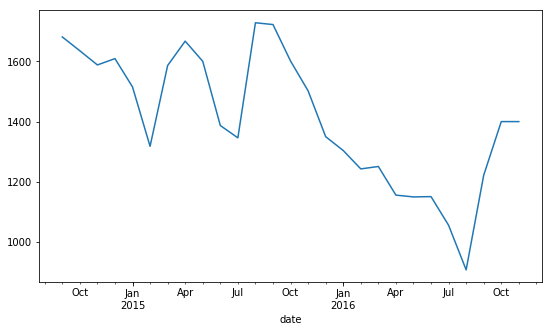

In [153]:
monthly_data.query('APMC == "Mumbai" & commodity == "coconut"').modal_price.plot()

Seasonality:  AxesSubplot(0.125,0.2;0.775x0.68)


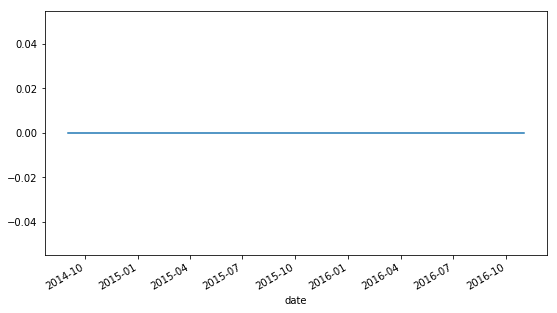

In [152]:
result = seasonal_decompose(monthly_data.query('APMC == "Ahmednagar" & commodity == "bajri"').modal_price, model='additive', freq=1)
print("Seasonality: ",result.seasonal.plot())

In [151]:
monthly_data.query('APMC == "Pune"').commodity.value_counts()


sweet potato             27
shevga                   27
flower                   27
chavli (shenga )         27
cucumber                 27
green peas (dry)         27
snake gourd              27
lentil                   27
beet root                27
bottle gourd             27
wal bhaji                27
ladies finger            27
elephant root            27
cluster bean             27
bitter gourd             27
small gourd              27
ginger (fresh)           27
carrot                   27
squash gourd             27
garlic                   27
green-peas               27
ghosali(bhaji)           27
green gram               27
gr.nut kernels           27
arvi                     26
tomato                   26
green chilli             26
jaggery                  26
walvad                   26
brinjal                  26
                         ..
ridge gourd              18
chillies(red)            16
bajri                    16
mula shenga              15
lemon               

Seasonality:  AxesSubplot(0.125,0.2;0.775x0.68)


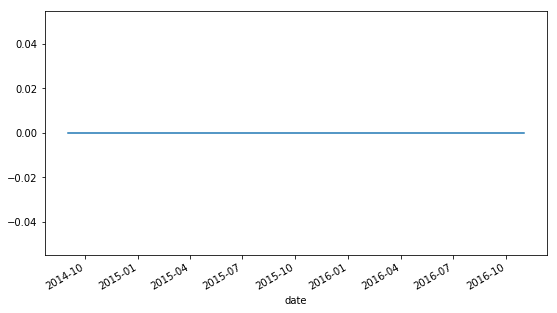

In [150]:
result = seasonal_decompose(monthly_data.query('APMC == "Pune" & commodity == "pavtta"').modal_price, model='additive', freq=1)
print("Seasonality: ",result.seasonal.plot())

In [149]:
monthly_data.query('APMC == "Satara"').commodity.value_counts()

garlic                   45
bottle gourd             27
ladies finger            27
ginger (fresh)           27
cucumber                 27
cluster bean             27
tomato                   26
shevga                   26
brinjal                  26
potato                   26
flower                   26
green-peas               26
capsicum                 26
bitter gourd             26
green chilli             26
pavtta                   25
onion                    25
cabbage                  25
carrot                   19
ghevda                   14
sweet potato              6
ground nut pods (dry)     6
Name: commodity, dtype: int64

Seasonality:  AxesSubplot(0.125,0.2;0.775x0.68)


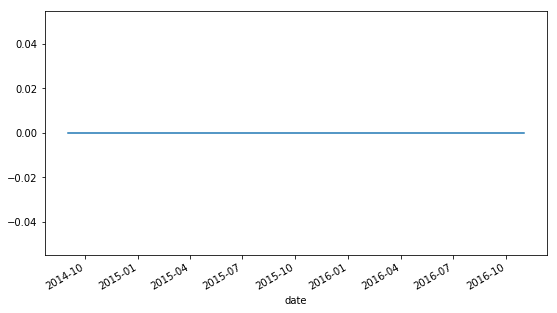

In [148]:
result = seasonal_decompose(monthly_data.query('APMC == "Satara" & commodity == "garlic"').modal_price, model='additive', freq=1)
print("Seasonality: ",result.seasonal.plot())

### The seasonality cannot be seen per commodity for a particular region as the data points are less that way. So, we take sum of all commodities for a region and check monthly seasonality.

C:\Users\Niranjan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'date' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


Seasonality:  AxesSubplot(0.125,0.125;0.775x0.755)


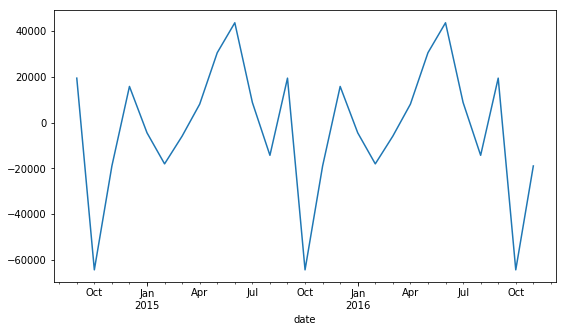

In [147]:
result = seasonal_decompose(monthly_data.query('APMC == "Mumbai"').groupby("date").sum().modal_price, model='additive', freq=12)
print("Seasonality: ",result.seasonal.plot())

C:\Users\Niranjan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'date' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


Seasonality:  AxesSubplot(0.125,0.125;0.775x0.755)


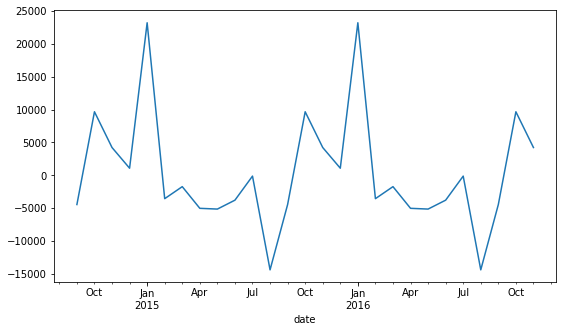

In [146]:
result = seasonal_decompose(monthly_data.query('APMC == "Pune"').groupby("date").sum().modal_price, model='additive', freq=12)
print("Seasonality: ",result.seasonal.plot())

C:\Users\Niranjan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'date' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


Seasonality:  AxesSubplot(0.125,0.125;0.775x0.755)


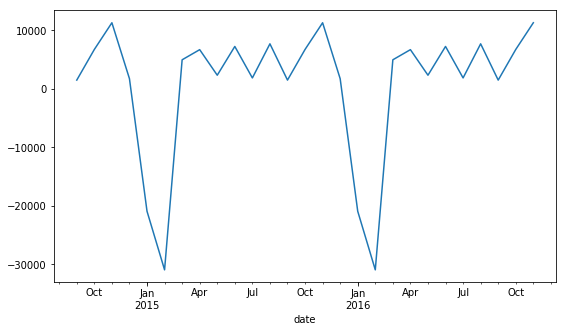

In [145]:
result = seasonal_decompose(monthly_data.query('APMC == "Nagpur"').groupby("date").sum().modal_price, model='additive', freq=12)
print("Seasonality: ",result.seasonal.plot())

C:\Users\Niranjan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'date' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  


Seasonality:  AxesSubplot(0.125,0.125;0.775x0.755)


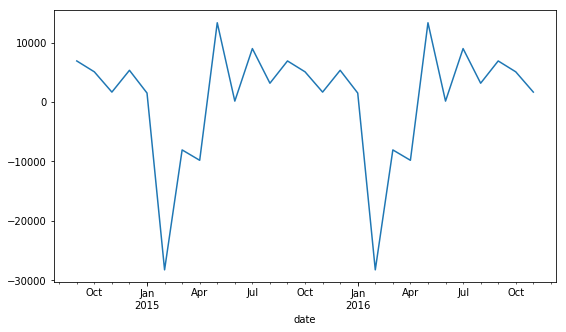

In [144]:

result = seasonal_decompose(monthly_data.query('APMC == "Barshi"').groupby("date").sum().modal_price, model='additive', freq=12)
print("Seasonality: ",result.seasonal.plot())

C:\Users\Niranjan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'date' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


Seasonality:  AxesSubplot(0.125,0.125;0.775x0.755)


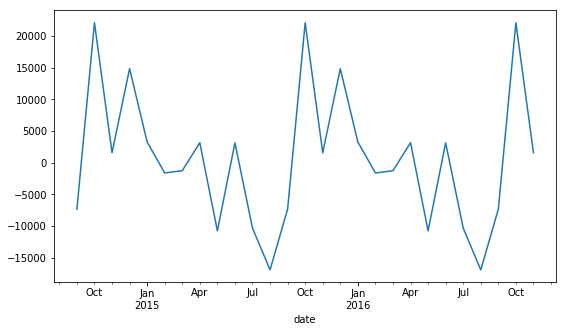

In [143]:
result = seasonal_decompose(monthly_data.query('APMC == "Jalgaon"').groupby("date").sum().modal_price, model='additive', freq=12)
print("Seasonality: ",result.seasonal.plot())

C:\Users\Niranjan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'date' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


Seasonality:  AxesSubplot(0.125,0.125;0.775x0.755)


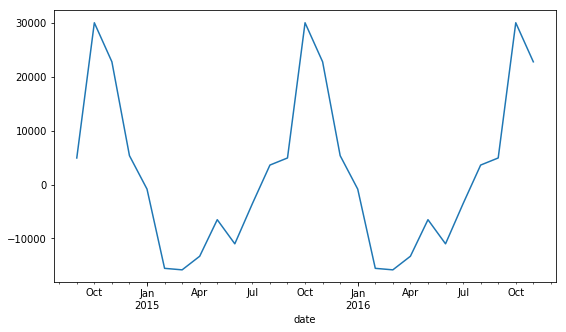

In [142]:
result = seasonal_decompose(monthly_data.query('APMC == "Solapur"').groupby("date").sum().modal_price, model='additive', freq=12)
print("Seasonality: ",result.seasonal.plot())

## For detecting seasonality we need those APMC's that have data for all 12 months, therefore we filter only those data points. We need to incorporate one more cleaning measure

In [23]:
import pandas as pd
monthly_data = pd.read_csv("Outlier_removed_mandi_data.csv")


In [24]:
filter_data = monthly_data[['APMC','commodity','Year','modal_price']].groupby(['APMC','Year','commodity'],as_index=False)
filter_data=filter_data.count()
filter_data=filter_data.rename(columns={'modal_price':'Frequency'})
filter_data = filter_data[filter_data['Frequency']==12].reset_index(drop=True)
filter_data.head()

,APMC,Year,commodity,Frequency
0,Aamgaon,2015,paddy-unhusked,12
1,Akhadabalapur,2015,soybean,12
2,Akluj,2015,bitter gourd,12
3,Akluj,2015,brinjal,12
4,Akluj,2015,cabbage,12


In [25]:
final_df =pd.DataFrame()
for i,row in filter_data.iterrows():
    temp_df = monthly_data[(monthly_data['APMC']==row.APMC) & (monthly_data['commodity']==row.commodity)]
    final_df = pd.concat([temp_df,final_df])
final_df.reset_index(drop=True,inplace = True)

In [26]:
final_df.head()

,APMC,commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,commodity.1
0,Yeotmal,soybean,2015,April,12384,3311,3739,3527.0,2015-04-01,Yewatmal,sunflower
1,Yeotmal,soybean,2016,April,20978,3661,4045,3857.0,2016-04-01,Yewatmal,sunflower
2,Yeotmal,soybean,2015,August,5958,3029,3321,3240.0,2015-08-01,Yewatmal,sunflower
3,Yeotmal,soybean,2016,August,3539,3089,3438,3282.0,2016-08-01,Yewatmal,sunflower
4,Yeotmal,soybean,2014,December,18921,3014,3300,3163.0,2014-12-01,Yewatmal,sunflower


In [27]:
final_df.to_csv("Seasonality_Analysis_data.csv",index=False)

## Seasonalize

In [30]:
monthly_data = pd.read_csv("Seasonality_Analysis_data.csv")
monthly_data['date'] = pd.to_datetime(monthly_data['date'])

### Type Function that adds a new column to the DataFrame with-
##### Multiplicative ( Observed = Level Trend Seasonal* Noise )
##### Additive ( Observed = Level+ Trend+ Seasonal+ Noise )

In [31]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf

def Type(apmc,commodity):
    dframe = monthly_data.groupby(['APMC','commodity']).get_group((apmc,commodity))[['date','modal_price']]
    dframe['date'] = pd.to_datetime(dframe['date'])
    dframe = dframe.sort_values(by=['date'])
    dframe = dframe.set_index('date')
    type_add = seasonal_decompose(dframe,model='additive', freq = 3).resid[1:-1] # Quarterly Analysis, freq=3, every 3 values
    type_mul = seasonal_decompose(dframe,model='multiplicative', freq = 3).resid[1:-1] # Resid Array Slicing
    detect_add = np.linalg.norm(acf(type_add)) # Correlation fucntion 'acf' to detect type
    detect_mul = np.linalg.norm(acf(type_mul))
    if(detect_add>detect_mul):
        return 'Multiplicative'
    else:
        return 'Additive'

In [32]:
temp_df= monthly_data.groupby(['APMC','commodity'])
temp_df=temp_df.size().reset_index()
temp_df= temp_df.rename(columns={0:'Frequency'})

In [33]:
temp_df.head()

,APMC,commodity,Frequency
0,Aamgaon,paddy-unhusked,27
1,Akhadabalapur,soybean,27
2,Akluj,bitter gourd,27
3,Akluj,brinjal,26
4,Akluj,cabbage,27


In [34]:
Seasonality_Detected = pd.DataFrame()
for i,row in temp_df.iterrows():
    ses_type = Type(row.APMC,row.commodity)
    df = monthly_data[(monthly_data['APMC']==row.APMC)&(monthly_data['commodity']==row.commodity)]
    df['Type'] = ses_type
    Seasonality_Detected=pd.concat([df,Seasonality_Detected])

In [35]:
show_df = Seasonality_Detected.groupby(['APMC','commodity','Type']).size().reset_index()
show_df.Type.value_counts()

Additive          441
Multiplicative    404
Name: Type, dtype: int64

In [36]:
#Adding a Quarter Column
monthly_data['Quarter'] = pd.to_datetime(monthly_data.date).dt.quarter
monthly_data.head()

,APMC,commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,commodity.1,Quarter
0,Yeotmal,soybean,2015,April,12384,3311,3739,3527.0,2015-04-01,Yewatmal,sunflower,2
1,Yeotmal,soybean,2016,April,20978,3661,4045,3857.0,2016-04-01,Yewatmal,sunflower,2
2,Yeotmal,soybean,2015,August,5958,3029,3321,3240.0,2015-08-01,Yewatmal,sunflower,3
3,Yeotmal,soybean,2016,August,3539,3089,3438,3282.0,2016-08-01,Yewatmal,sunflower,3
4,Yeotmal,soybean,2014,December,18921,3014,3300,3163.0,2014-12-01,Yewatmal,sunflower,4


### Using rolling mean with quarterly window
##### mean over grouped quarters
##### Obtain residual component of the price(Seasonal-trend)
##### ACF to find the Type

In [37]:
def Seasonality_Detect(apmc,comm):
    df = monthly_data.groupby(['APMC','commodity']).get_group((apmc,comm))[['date','modal_price','Quarter']]
    #Grouping date, modal price, quarter for each apmc and commodity
    df['date'] = pd.to_datetime(df['date'])
    df = df.sort_values(by=['date'])
    df = df.set_index('date')
    # FIRST
    df['Trend'] = df['modal_price'].rolling(window = 2).mean() # To know the real trend of the data, by averaging
    df['add_remove'] = df['modal_price'] - df['Trend'] # Subtract trend
    df['mul_remove'] = df['modal_price'] / df['Trend'] # Divide Trend
    #SECOND
    add_qrt_mean = df.groupby(['Quarter'])[['add_remove','Quarter']].mean().to_dict()['add_remove']
    #Groups based on quarter, keeps addremove, quarter columns. mean() keeps only 4 values ie. of each quarter.
    mul_qrt_mean = df.groupby(['Quarter'])[['mul_remove','Quarter']].mean().to_dict()['mul_remove']
    
    df['add_ses_com'] = df['Quarter'].apply(lambda x: add_qrt_mean[x])
    df['mul_ses_com'] = df['Quarter'].apply(lambda x: mul_qrt_mean[x])
    #THIRD
    df['add_residual'] = df['add_remove'] - df['add_ses_com']
    df['mul_residual'] = df['mul_remove'] - df['mul_ses_com']
    #FOURTH and LAST
    detect_add = sum(np.asarray(acf(df['add_residual']))*2) # Detect type
    detect_mul = sum(np.asarray(acf(df['mul_residual']))*2)
    if(detect_add>detect_mul):
        return 'Multiplicative'
    else:
        return 'Additive'
    

In [38]:
temp_df= monthly_data.groupby(['APMC','commodity']).size().reset_index().rename(columns={0:'Frequency'})
Seasonality_Detected_2 = pd.DataFrame()
for i,row in temp_df.iterrows():
    ses_type = Seasonality_Detect(row.APMC,row.commodity)
    df = monthly_data[(monthly_data['APMC']==row.APMC)&(monthly_data['commodity']==row.commodity)]
    df['Type'] = ses_type
    Seasonality_Detected_2=pd.concat([df,Seasonality_Detected_2])

In [40]:
show_df = Seasonality_Detected_2.groupby(['APMC','commodity','Type']).size().reset_index()
show_df.Type.value_counts()

Additive    845
Name: Type, dtype: int64

In [39]:
Seasonality_Detected.to_csv('Seasonality_Type_Detected_Data.csv',index=False)